In [1]:
import keras

Using TensorFlow backend.


In [2]:
# Check Your GPU device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Connect to your google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# List Everything in your Google Drive. Note that DataCatOrDog.zip shall be uploaded to your Google Drive first
!ls /content/drive/My\ Drive

'5) What is the role of moral leadership in business.gdoc'
'Argumentative essay final draft.gdoc'
'BAAI Project Proposal.docx'
'BAAI Project Proposal.gdoc'
 chest_xray
 ChestxrayModel.hdf5
 chest-xray-pneumonia.zip
'Colab Notebooks'
'Deliverable 5'
'Deliverable #5 .gdoc'
'Electronic ticket receipt, June 10 for ANTENEH MARIAMAWIT  G.pdf'
 glove.6B.50d.txt
 history.pkl
'HTAR09961 (181).JPG'
'HTAR09961 (184).JPG'
'HTAR09961 (2).MOV'
 i-765-3.pdf
'images(2).pdf'
 IMG_0252.MOV
 International-Student-Aid-App-2015-2016.pdf
'JO Resume .docx'
 Lecture9-on-Colab.ipynb
'pdfDoc OPT Request (1).pdf'
'personal essay second draft.docx.gdoc'
'personal essay third and final draft.docx'
'SamrawitA-Resume  .pages'
'Teenage Sex.docx'
 test_emoji.csv
'to be bought.gdoc'
 train_emoji.csv
'Untitled Diagram (1).drawio'
'Untitled Diagram (2).drawio'
'Untitled Diagram.drawio'
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'Womens Clothing E-Commerce Reviews.csv'
'writting argumentative essay second draft

In [5]:
# Check Current Working Directory 
!pwd

/content


In [0]:
# Change Your Working Directory to Your Google Drive
import os
os.chdir('/content/drive/My Drive')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


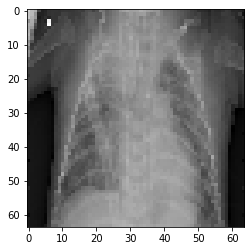

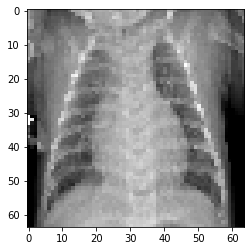

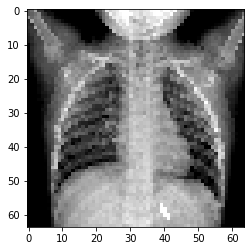

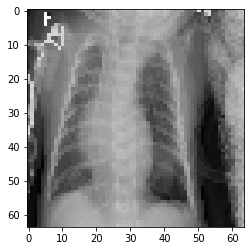

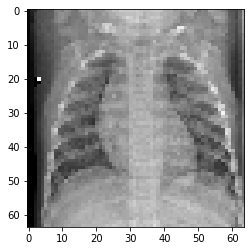

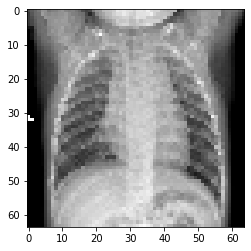

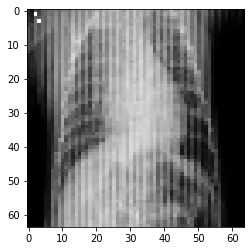

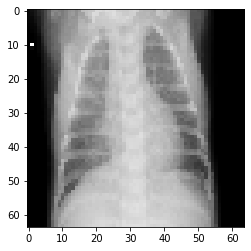

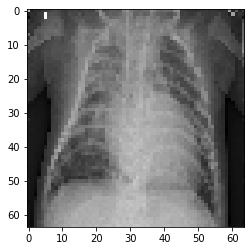

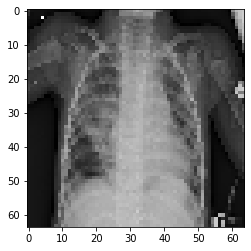

In [10]:
# Read Images from Folders      
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')   
from matplotlib import pyplot as plt
x,y = training_set.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 6 - Flattening
classifier.add(Flatten())

""" New Layer: Dropout """
classifier.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier.summary()

classifier.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4608)             

In [14]:
#Fitting the CNN to the images
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 5216,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 624)

# save model to single file
classifier.save("chestxrayModel_dropout.hdf5") # Hierarchical Data Format Fifth Version
print("Saved model to disk")

# save training history to another file
import pickle 
filehandler = open('history_dropout.pkl', 'wb') 
pickle.dump(history, filehandler)

Epoch 1/5
5216/5216 [==============================] - 1838s 352ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 4.0716 - val_accuracy: 0.7289
Epoch 2/5
5216/5216 [==============================] - 1806s 346ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 1.1263 - val_accuracy: 0.7712
Epoch 3/5
5216/5216 [==============================] - 1781s 341ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 5.7568 - val_accuracy: 0.7499
Epoch 4/5
5216/5216 [==============================] - 1786s 342ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 8.5980 - val_accuracy: 0.7340
Epoch 5/5
5216/5216 [==============================] - 1783s 342ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 5.3945 - val_accuracy: 0.7756
Saved model to disk


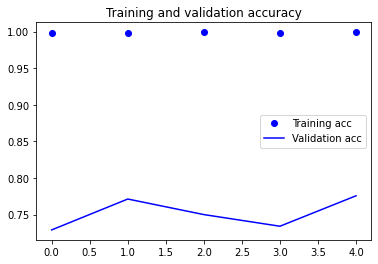

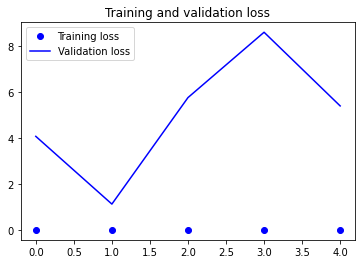

In [15]:
# Let's plot the loss and accuracy of the model over the training and validation data during training:
import pickle
with open('history.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
    
# Let's plot our results again:
#import pickle
#with open('history.pkl', 'rb') as pickle_file:
#    content = pickle.load(pickle_file)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()